# Plot COVID-19 data on a specific department

In [20]:
import sys

print("Python version")
print(sys.version)

Python version
3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]


In [21]:
%load_ext lab_black
%matplotlib inline

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [28]:
import matplotlib.pyplot as plt
import pandas as pd

pd.plotting.register_matplotlib_converters()

In [29]:
dep = "36"
figsize = (15, 10)

In [30]:
covid_url = (
    "https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7"
)

#### <br> Load table with COVID-19 data (figures by dates)

In [31]:
df = pd.read_csv(covid_url, sep=";", parse_dates=True, index_col=2)
df = df.query("sexe == 0")  # sum male/female
df.drop(columns=["sexe"], inplace=True)
df.sort_index(inplace=True)
df.rename(
    columns={
        "hosp": "Number of people hospitalized",
        "rea": "Number of people in resuscitation or critical care",
        "rad": "Total amount of patients that returned home",
        "dc": "Total amount of deaths",
    },
    inplace=True,
)
df.head(2)

,dep,Number of people hospitalized,Number of people in resuscitation or critical care,Total amount of patients that returned home,Total amount of deaths
jour,,,,,
2020-03-18,01,2,0,1,0
2020-03-18,02,41,10,18,11


In [32]:
sdf = df[df["dep"] == dep]

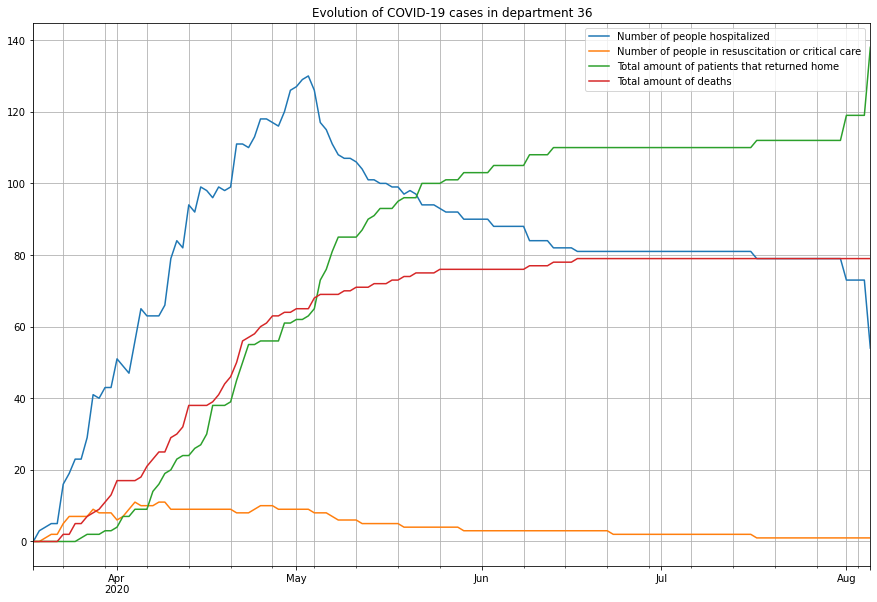

In [33]:
f, ax = plt.subplots(figsize=figsize)
sdf.plot(ax=ax, subplots=False, sharex=True, grid=True)
ax.grid(True, which="both")
ax.set_title("Evolution of COVID-19 cases in department " + dep)
img_name = dep + ".png"
ax.xaxis.set_label_text("")
f.savefig(img_name)
plt.show()